<a href="https://colab.research.google.com/github/send0moka/uas-pcd/blob/main/H1D022006_Jehian_Athaya_Tsani_Az_Zuhry_UAS_PCD_No_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import libraries untuk computer vision dan data analysis

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load gambar dari GitHub repository dan konversi ke grayscale dan binary

In [4]:
import urllib.request

# Download images dari GitHub
base_url = 'https://raw.githubusercontent.com/send0moka/uas-pcd/main/'
image_files = ['image1.png', 'image2.png'] # image1: jehian, image2: brian

for img_file in image_files:
    urllib.request.urlretrieve(base_url + img_file, img_file)
    print(f'Downloaded: {img_file}')

Downloaded: image1.png
Downloaded: image2.png


In [9]:
# Load gambar asli
gambarAsli1 = cv2.imread('image1.png')
gambarAsli2 = cv2.imread('image2.png')

# Convert BGR ke RGB untuk matplotlib
gambarAsli1 = cv2.cvtColor(gambarAsli1, cv2.COLOR_BGR2RGB)
gambarAsli2 = cv2.cvtColor(gambarAsli2, cv2.COLOR_BGR2RGB)

# Convert ke grayscale
convertGambarAsli1 = cv2.imread('image1.png', cv2.IMREAD_GRAYSCALE)
convertGambarAsli2 = cv2.imread('image2.png', cv2.IMREAD_GRAYSCALE)

# Convert ke binary
_, gambar1 = cv2.threshold(convertGambarAsli1, 127, 255, cv2.THRESH_BINARY)
_, gambar2 = cv2.threshold(convertGambarAsli2, 127, 255, cv2.THRESH_BINARY)

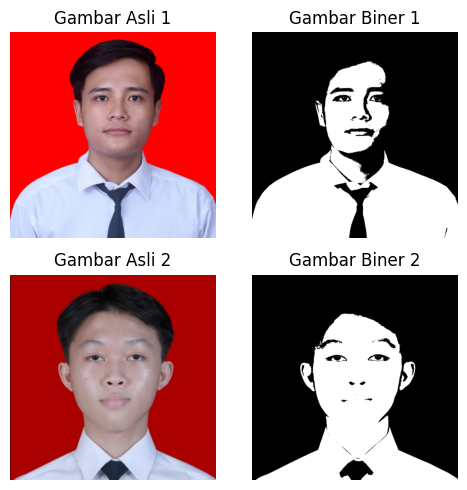

In [11]:
# Tampilkan hasil
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
ax = axes.ravel()

ax[0].imshow(gambarAsli1)
ax[0].set_title('Gambar Asli 1')
ax[0].axis('off')

ax[1].imshow(gambar1, cmap='gray')
ax[1].set_title('Gambar Biner 1')
ax[1].axis('off')

ax[2].imshow(gambarAsli2)
ax[2].set_title('Gambar Asli 2')
ax[2].axis('off')

ax[3].imshow(gambar2, cmap='gray')
ax[3].set_title('Gambar Biner 2')
ax[3].axis('off')

plt.tight_layout()
plt.show()

### 3. Operasi bitwise AND, OR, dan XOR pada gambar binary.

In [13]:
# Cek ukuran gambar
print(f"Ukuran gambar1: {gambar1.shape}")
print(f"Ukuran gambar2: {gambar2.shape}")

# Resize gambar2 sesuai gambar1
gambar2_resized = cv2.resize(gambar2, (gambar1.shape[1], gambar1.shape[0]))

# Operasi bitwise
gambar_AND = cv2.bitwise_and(gambar1, gambar2_resized)
gambar_OR = cv2.bitwise_or(gambar1, gambar2_resized)
gambar_XOR = cv2.bitwise_xor(gambar1, gambar2_resized)

Ukuran gambar1: (1080, 1080)
Ukuran gambar2: (713, 713)


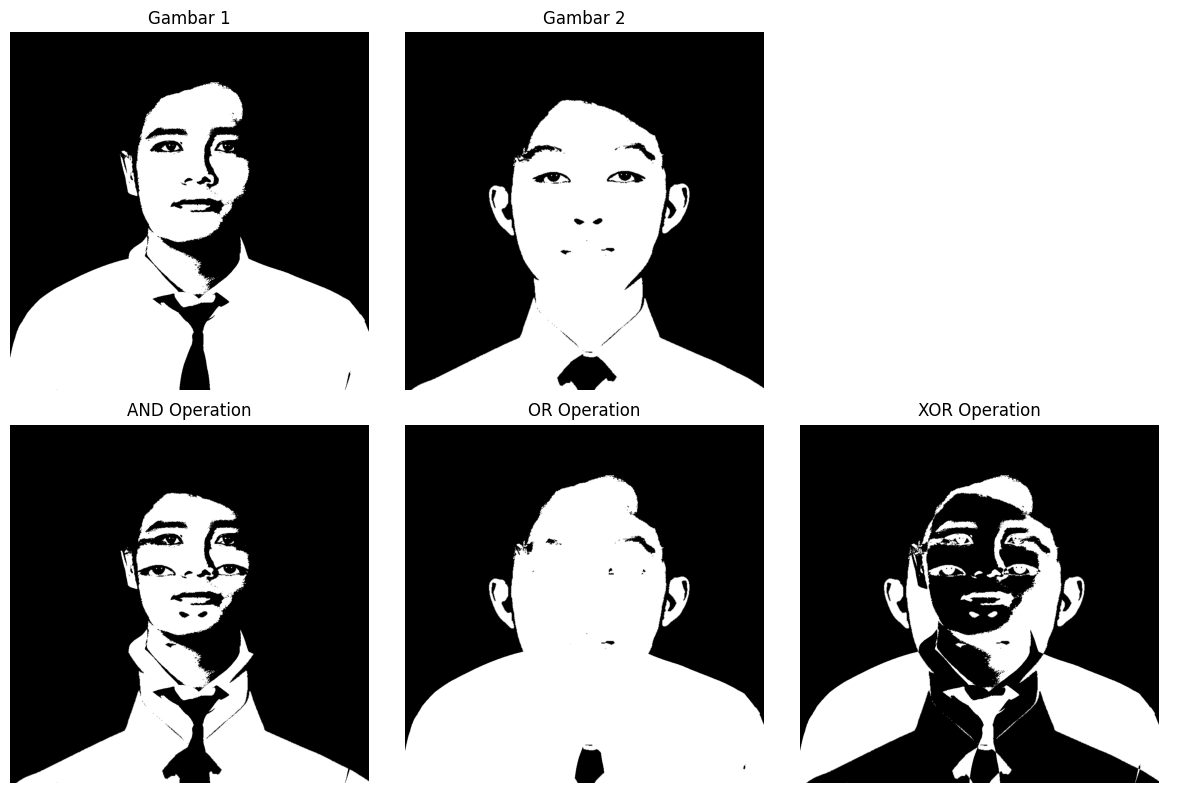

In [14]:
# Tampilkan hasil operasi bitwise
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(gambar1, cmap='gray')
ax[0].set_title('Gambar 1')
ax[0].axis('off')

ax[1].imshow(gambar2_resized, cmap='gray')
ax[1].set_title('Gambar 2')
ax[1].axis('off')

ax[2].axis('off')  # Kosongkan ax[2]

ax[3].imshow(gambar_AND, cmap='gray')
ax[3].set_title('AND Operation')
ax[3].axis('off')

ax[4].imshow(gambar_OR, cmap='gray')
ax[4].set_title('OR Operation')
ax[4].axis('off')

ax[5].imshow(gambar_XOR, cmap='gray')
ax[5].set_title('XOR Operation')
ax[5].axis('off')

plt.tight_layout()
plt.show()